In [18]:
# from PIL import Image, ImageDraw, ImageFont
# from matplotlib import pyplot as plt
import glob

In [13]:
categories ={
    "aging": 1,
    "imbalance": 2,
    "CONTAM":0,
    "watermark":3
}
categories_list = ['CONTAM', 'aging', 'imbalance', 'watermark']
categories_list = ['aging','imbalance','CONTAM','watermark']
categories_list = ['CONTAM', 'aging', 'imbalance', 'watermark']

In [280]:
def convertJsonValues():
    img_path = './dataset/1207_mycell/image/0510/A2305100018.JPG'
    date_dir = img_path.split('.JPG')[0].split('/')[-2]
    file_name = img_path.split('.JPG')[0].split('/')[-1]
    target_json = './dataset/1207_mycell/oringinal_json/23'+date_dir+'.json'
    #     print(target_json,file_name)

    assert os.path.isfile(target_json)
    with open(target_json,'r') as f:
        json_data = json.load(f)
    for l in json_data['frames']:
        json_file_name = l['name'].split('/')[-1].split('.JPG')[0]
        if json_file_name == file_name:
            for ll in l['labels']:
                try:
                    class_index = str(categories[ll['category']])
                    x1 = ll['box2d']['x1']
                    x2 = ll['box2d']['x2']
                    y1 = ll['box2d']['y1']
                    y2 = ll['box2d']['y2']
                    print(ll['id'],x1,x2,y1,y2,categories_list[int(class_index)])
#                     if x2 < x1:
#                         draw.rectangle((x2,y2,x1,y1), outline=(0,255,0), width = 8)
#                     else: 
#                         draw.rectangle((x1,y1,x2,y2), outline=(0,255,0), width = 8)
#                     try:
#                         draw.text((x1,y2), categories_list[int(class_index)], (255,255,0), font=ImageFont.truetype("Arial", size=200))
#                     except IOError: 
#                         print('no font')
                except: continue # 아마 val or test set에 있을 것


In [287]:
test_pred_labels_dir = './yolov7/runs/test/exp23/labels/'
test_pred_labels_dir = './yolov7/runs/detect/exp76/labels/'
test_labels_dir = './yolov7/data/test/labels/'

In [288]:
def covertTxtValues(label_txt):
    tt = []
    with open(label_txt,'r') as f:
        for line in f: 
#             print(line.strip())
#             print(line.strip().split(' '))
            ttt = []
            for t in line.strip().split(' '): ttt.append(float(t))
            tt.append(ttt)
    
    return tt

In [289]:
# covertTxtValues('./yolov7/data/test/labels/A2306270002_JPG.rf.9be28b3787184feffec6bda9e86af34f.txt')

In [290]:
# print(covertTxtValues())
# print(covertTxtValues(test_pred_labels_dir+'/*'))

a = []
b = []
for label_txt in glob.glob(test_labels_dir+'/*'):
    try:
        a.append(covertTxtValues(label_txt))
    except TypeError: a.append([])
#     break
for label_txt in glob.glob(test_pred_labels_dir+'/*'):
    b.append(covertTxtValues(label_txt))
#     break

In [291]:
##
a = []
b = []
for label_txt in glob.glob(test_pred_labels_dir+'/*'):
    b.append(covertTxtValues(label_txt))
    a.append(covertTxtValues(test_labels_dir+label_txt.split('/')[-1]))
##

In [292]:
len(a), len(b)
test_labels_dir, test_pred_labels_dir 

('./yolov7/data/test/labels/', './yolov7/runs/detect/exp76/labels/')

In [293]:
# glob.glob(test_labels_dir+'*'), glob.glob(test_pred_labels_dir+'*')
len(glob.glob(test_labels_dir+'*')), len(glob.glob(test_pred_labels_dir+'*'))

(112, 104)

In [294]:
def getArea(box):
    return (box[2] - box[0] + 1) * (box[3] - box[1] + 1)


def getUnionAreas(boxA, boxB, interArea=None):
    area_A = getArea(boxA)
    area_B = getArea(boxB)
    
    if interArea is None:
        interArea = getIntersectionArea(boxA, boxB)
        
    return float(area_A + area_B - interArea)

def getIntersectionArea(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # intersection area
    return (xB - xA + 1) * (yB - yA + 1)
def boxesIntersect(boxA, boxB):
    if boxA[0] > boxB[2]:
        return False  # boxA is right of boxB
    if boxB[0] > boxA[2]:
        return False  # boxA is left of boxB
    if boxA[3] < boxB[1]:
        return False  # boxA is above boxB
    if boxA[1] > boxB[3]:
        return False  # boxA is below boxB
    return True

def yolo_to_coordinate(box):
    x, y, width, height = map(float, box)
    # 바운딩 박스 좌표 계산
    x1 = int((x - width / 2) * 640)
    y2 = int((y - height / 2) * 640)
    x2 = int((x + width / 2) * 640)
    y1 = int((y + height / 2) * 640)
    if x1 > x2:
        h = x2; x2 = x1; x1 = h
    if y1 > y2:
        h = y2; y2 = y1; y1 = h
    return [x1,y1,x2,y2]

def iou(boxA, boxB):
    # if boxes dont intersect
    boxA = yolo_to_coordinate(boxA)
    boxB = yolo_to_coordinate(boxB)
    if boxesIntersect(boxA, boxB) is False:
        return 0
    interArea = getIntersectionArea(boxA, boxB)
    union = getUnionAreas(boxA, boxB, interArea=interArea)
    
    # intersection over union
#     print(interArea)
#     print(union)
    result = interArea / union
    assert result >= 0
    return result
# iou((0.8257591406734146, 0.32944732297063906, 0.07291881842594501, 0.07512953367875648),\
#    (0.838281, 0.321094, 0.096875, 0.09375))

In [295]:
# target_bbox,a[file_labels][num][1:]
# b[file_labels][10][1:], a[file_labels][10][1:]
# # int((0.610547 - 0.065625 / 2) * 640) #369

In [296]:
# iou(target_bbox,a[file_labels][num][1:])
# iou(b[file_labels][10][1:], a[file_labels][10][1:])

In [297]:
len(a),len(b)

(104, 104)

In [298]:
from sklearn.metrics import classification_report

In [308]:
# a -> [ 각 파일마다[bounding box list] ] 
# a=test_labels_dir
# b=test_pred_labels_dir

# pred의 각 box마다 truth box 모두와 비교해서 iou구하기
# if iou > threshold, label 비교!
iou_threshold = 0.5
# print(len(a),len(b))
truth = []
pred = []

for file_labels in range(len(b)):
    for label_num in range(len(b[file_labels])):
#         print(b[file_labels][label_num]); print("*****")
        target_bbox = b[file_labels][label_num][1:]
        for num in range(len(a[file_labels])):
#             print(a[file_labels][num]); print("$$$$")
            if iou(target_bbox,a[file_labels][num][1:]) > iou_threshold:
#                 print('file_name: {}'.format(glob.glob(test_pred_labels_dir+'*')[file_labels]))
#                 print(iou(target_bbox,a[file_labels][num][1:]))
#                 print(a[file_labels][num][0], b[file_labels][label_num][0])
                pred.append(b[file_labels][label_num][0])
                truth.append(a[file_labels][num][0])


In [309]:
len(truth), len(pred)

(411, 411)

In [310]:
from sklearn.metrics import classification_report

print(classification_report(truth, pred, target_names=categories_list))

              precision    recall  f1-score   support

      CONTAM       0.98      0.93      0.95        45
       aging       0.91      0.88      0.89       154
   imbalance       0.93      0.93      0.93       193
   watermark       0.54      0.74      0.62        19

    accuracy                           0.90       411
   macro avg       0.84      0.87      0.85       411
weighted avg       0.91      0.90      0.91       411



/compuworks/anaconda3/envs/minhwa_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


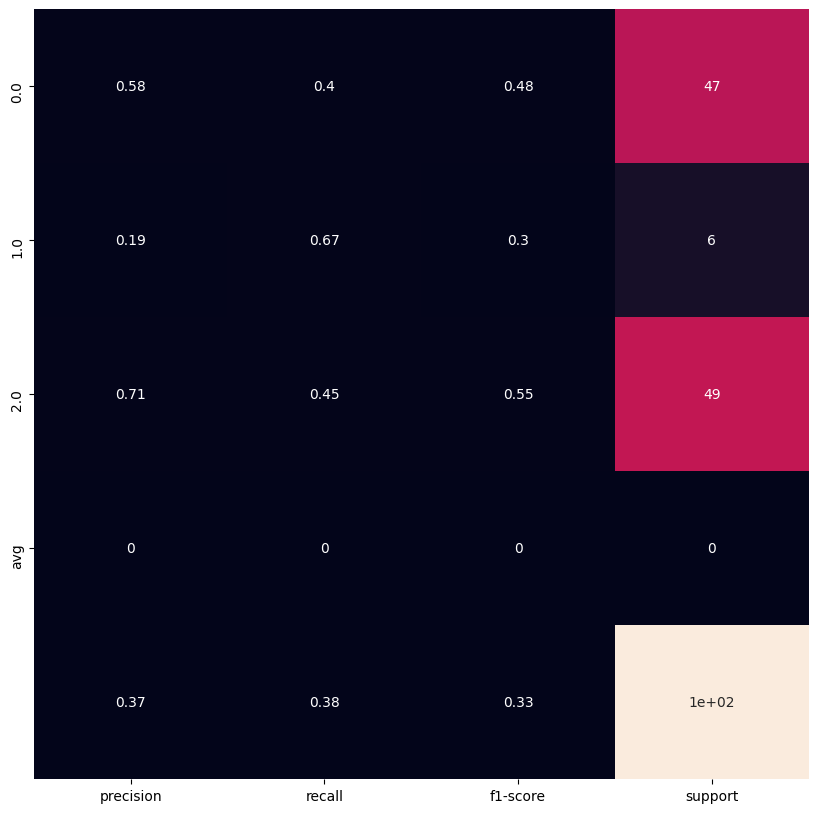

In [134]:
plot_classification_report(truth, pred)

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)


./yolov7/runs/detect/exp74/A2310240005_JPG.rf.cc28be0b39c96f90bf9fefbaf13e70b5.jpg


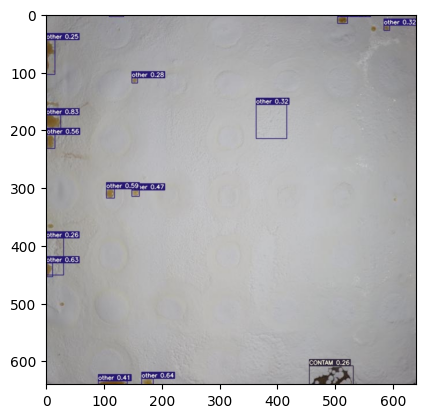

In [409]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt

num = 54
# 이미지 로드
img_path = './yolov7/data/test/images/A2303220026_JPG.rf.4f2a9bc2d358e5cb684576ec897604f3.jpg'
img_path = glob.glob('./yolov7/runs/detect/exp74/*')[num]
print(img_path)
img = Image.open(img_path)#.convert('RGB')
#img.show()
# print(img.size[0],img.size[1])
draw = ImageDraw.Draw(img)
plt.imshow(img)
plt.show()

./yolov7/runs/detect/exp76/A2305030010_JPG.rf.da6c6d872b2955627d7d4e3c5ca887ac.jpg


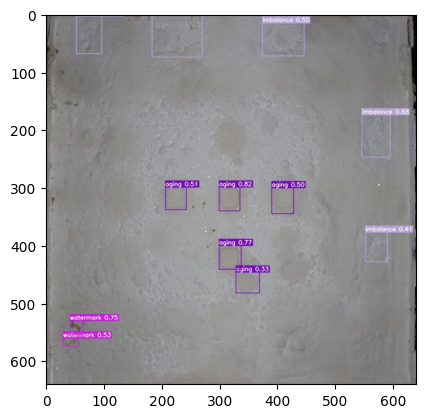

In [319]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt

num = 58
# 이미지 로드
img_path = './yolov7/data/test/images/A2303220026_JPG.rf.4f2a9bc2d358e5cb684576ec897604f3.jpg'
img_path = glob.glob('./yolov7/runs/detect/exp76/*')[num]
img = Image.open(img_path)#.convert('RGB')
#img.show()
# print(img.size[0],img.size[1])
draw = ImageDraw.Draw(img)

# YOLOv7 결과 파일 읽기
label_path = './yolov7/data/test/labels/A2303220026_JPG.rf.4f2a9bc2d358e5cb684576ec897604f3.txt'
label_path = glob.glob('./yolov7/data/test/labels/*')[num]
with open(label_path, 'r') as file:
    lines = file.readlines()
# print(lines)
# 각 객체에 대한 바운딩 박스 및 라벨 그리기
for line in lines:
    class_id, x, y, width, height = map(float, line.split())

    # 바운딩 박스 좌표 계산
    x1 = int((x - width / 2) * img.size[0])
    y2 = int((y - height / 2) * img.size[1])
    x2 = int((x + width / 2) * img.size[0])
    y1 = int((y + height / 2) * img.size[1])
    if x1 > x2:
        h = x2; x2 = x1; x1 = h
    if y1 > y2:
        h = y2; y2 = y1; y1 = h
    draw.rectangle((x1,y1,x2,y2), outline=(0,255,0), width = 1)

    try:
        draw.text((x1,y2), categories_list[int(class_id)], (255,255,0), font=ImageFont.truetype("Arial", size=25))
    except IOError: 
        print('no font')

#     # 바운딩 박스 및 텍스트 그리기
#     cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)
#     label = f'{categories_list[int(class_id)]}'
#     cv2.putText(image, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# # 결과 이미지 표시
# cv2.imshow('YOLOv7 Detection', image)

plt.imshow(img)
plt.show()


In [20]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt

# 이미지 로드
img_path = './yolov7/data/test/images/A2303220026_JPG.rf.87d103a38e4d2d08fab2270b1cfe6197.jpg'
img = Image.open(img_path)#.convert('RGB')
#img.show()
# print(img.size[0],img.size[1])
draw = ImageDraw.Draw(img)

# YOLOv7 결과 파일 읽기
with open('./yolov7/runs/test/exp/labels/A2303220026_JPG.rf.87d103a38e4d2d08fab2270b1cfe6197.txt', 'r') as file:
    lines = file.readlines()
# print(lines)
# 각 객체에 대한 바운딩 박스 및 라벨 그리기
for line in lines:
    class_id, x, y, width, height = map(float, line.split())

    # 바운딩 박스 좌표 계산
    x1 = int((x - width / 2) * img.size[0])
    y2 = int((y - height / 2) * img.size[1])
    x2 = int((x + width / 2) * img.size[0])
    y1 = int((y + height / 2) * img.size[1])
    if x1 > x2:
        h = x2; x2 = x1; x1 = h
    if y1 > y2:
        h = y2; y2 = y1; y1 = h
    draw.rectangle((x1,y1,x2,y2), outline=(0,255,0), width = 1)

    try:
        draw.text((x1,y2), categories_list[int(class_id)], (255,255,0), font=ImageFont.truetype("Arial", size=25))
    except IOError: 
        print('no font')

#     # 바운딩 박스 및 텍스트 그리기
#     cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)
#     label = f'{categories_list[int(class_id)]}'
#     cv2.putText(image, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# # 결과 이미지 표시
# cv2.imshow('YOLOv7 Detection', image)

plt.imshow(img)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: './yolov7/data/test/images/A2303220026_JPG.rf.87d103a38e4d2d08fab2270b1cfe6197.jpg'

In [11]:
import glob
glob.glob('.'+'/*')

['./Untitled.ipynb',
 './yolov7',
 './data_preprocessing_gaia.ipynb',
 './faster_rcnn.ipynb',
 './GAIA-det',
 './dataset',
 './yolov7_result.ipynb',
 './mixed-segdec-net-comind2021-master',
 './data_preprocessing_yolo.ipynb']

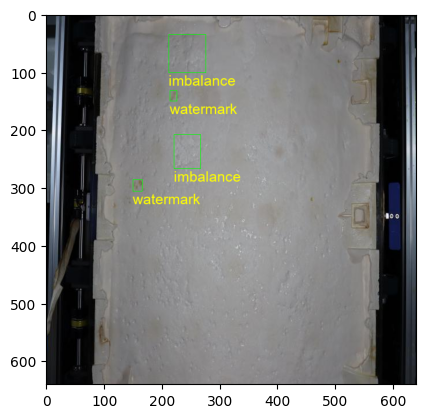

In [25]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt


categories_list = ['CONTAM', 'aging', 'imbalance', 'watermark']
# categories_list = ['imbalance','other']

# 이미지 로드
img_path = './yolov7/data/test/images/A2303220026_JPG.rf.80869115b2c439a540e1fbcf3d05ca83.jpg'
img = Image.open(img_path)#.convert('RGB')
# print(img.size[0],img.size[1])
draw = ImageDraw.Draw(img)
# 라벨 결과 텍스트 파일
target_txt = './yolov7/runs/detect/exp/labels/A2303220026_JPG.rf.80869115b2c439a540e1fbcf3d05ca83.txt'
with open(target_txt, 'r') as file:
    lines = file.readlines()

# 각 객체에 대한 바운딩 박스 및 라벨 그리기
for line in lines:
    class_id, x, y, width, height = map(float, line.split())

    # 바운딩 박스 좌표 계산
    x1 = int((x - width / 2) * img.size[0])
    y2 = int((y - height / 2) * img.size[1])
    x2 = int((x + width / 2) * img.size[0])
    y1 = int((y + height / 2) * img.size[1])
    if x1 > x2:
        h = x2; x2 = x1; x1 = h
    if y1 > y2:
        h = y2; y2 = y1; y1 = h
    draw.rectangle((x1,y1,x2,y2), outline=(0,255,0), width = 1)

    try:
        draw.text((x1,y2), categories_list[int(class_id)], (255,255,0), font=ImageFont.truetype("Arial", size=25))
    except IOError: 
        print('no font')

plt.imshow(img)
plt.show()
